<a href="https://colab.research.google.com/github/Arunav07/CRISTL-Project-1/blob/Atharva_D's-Branch/Approach_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import natsort
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# import tensorflow.keras.utils.to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
Image_10=['/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000006_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000054_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/0000060.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000060_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000066_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000072_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000078_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000084_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000090_r.jpg', '/content/gdrive/My Drive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000096_r.jpg']

In [16]:
Image_array=[]
for i in Image_10:
  img = image.load_img(i,target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255
  Image_array.append(img)
Image_Data = np.array(Image_array)

In [17]:
Image_Data.shape

(10, 256, 256, 3)

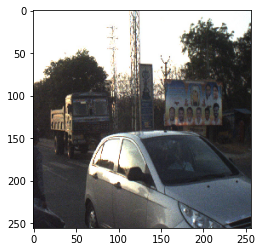

In [18]:
plt.imshow(Image_Data[2])

In [19]:
Labels_Data = pd.read_csv("/content/gdrive/MyDrive/IDD_Detection/10 Labels.csv")
Labels_Data.shape

(10, 11)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Image_Data, Labels_Data, random_state=42, test_size=0.2)

In [21]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 969.6025 - accuracy: 0.3750 - val_loss: 129.8720 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 83ms/step - loss: 489.8120 - accuracy: 0.3750 - val_loss: 58.4124 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 88ms/step - loss: 255.4229 - accuracy: 0.2500 - val_loss: 25.8484 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 83ms/step - loss: 99.3552 - accuracy: 0.1250 - val_loss: 11.1624 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 87ms/step - loss: 46.7436 - accuracy: 0.2500 - val_loss: 4.7738 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 87ms/step - loss: 26.3340 - accuracy: 0.6250 - val_loss: 2.0649 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 84ms/step - loss: 9.0499 - accuracy: 0.7500 - val_loss: 0.9723 - val_accuracy: 1.0000
Epoch 8/10
1/1 

#Top 11 Probabilities

##**Prediction 1**

In [35]:
img = image.load_img('/content/gdrive/MyDrive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/0000060.jpg',target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255

truck (0.94263)
person (0.85015)
autorickshaw (0.83864)
motorcycle (0.80399)
car (0.66576)
bus (0.40657)
bicycle (0.36438)
rider (0.36081)
vehicle fallback (0.3487)
animal (0.18737)
traffic sign  (0.17552)


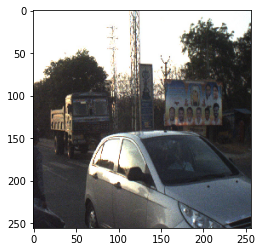

In [38]:
classes = np.array(Labels_Data.columns[:])
proba = model.predict(img.reshape(1,256,256,3))
top_11 = np.argsort(proba[0])[::-1]
for i in range(11):
    print("{}".format(classes[top_11[i]])+" ({:.5})".format(proba[0][top_11[i]]))
plt.imshow(img)

##**Prediction 2**

In [39]:
img = image.load_img('/content/gdrive/MyDrive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/0000240.jpg',target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255



truck (0.83114)
person (0.75278)
autorickshaw (0.71007)
motorcycle (0.66999)
car (0.58833)
bus (0.45001)
vehicle fallback (0.43125)
rider (0.41426)
bicycle (0.4002)
animal (0.29771)
traffic sign  (0.28927)


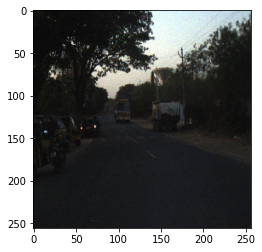

In [40]:
classes = np.array(Labels_Data.columns[:])
proba = model.predict(img.reshape(1,256,256,3))
top_11 = np.argsort(proba[0])[::-1]
for i in range(11):
    print("{}".format(classes[top_11[i]])+" ({:.5})".format(proba[0][top_11[i]]))
plt.imshow(img)

##**Prediction 3**

In [41]:
img = image.load_img('/content/gdrive/MyDrive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/000054_r.jpg',target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255

truck (0.80475)
person (0.71982)
autorickshaw (0.68412)
motorcycle (0.64698)
car (0.57249)
bus (0.44941)
vehicle fallback (0.44152)
rider (0.43227)
bicycle (0.41538)
animal (0.32335)
traffic sign  (0.31012)


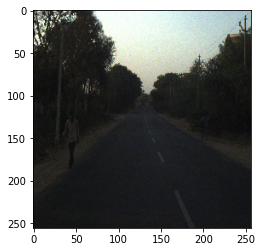

In [52]:
classes = np.array(Labels_Data.columns[:])
proba = model.predict(img.reshape(1,256,256,3))
top_11 = np.argsort(proba[0])[::-1]
for i in range(11):
    print("{}".format(classes[top_11[i]])+" ({:.5})".format(proba[0][top_11[i]]))
plt.imshow(img)

#Top 5 probabilities

truck (0.86107)
person (0.76556)
autorickshaw (0.73004)
motorcycle (0.68814)
car (0.59114)


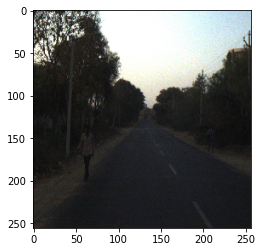

In [55]:
img = image.load_img('/content/gdrive/MyDrive/IDD_Detection/JPEGImages/frontFar/BLR-2018-03-22_17-39-26_2_frontFar/0000540.jpg',target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255


classes = np.array(Labels_Data.columns[:])
proba = model.predict(img.reshape(1,256,256,3))
top_5 = np.argsort(proba[0])[:-6:-1]
for i in range(5):
    print("{}".format(classes[top_5[i]])+" ({:.5})".format(proba[0][top_5[i]]))
plt.imshow(img)